# Machine Learning in Nonlinear Dynamical Systems

## 1. Introduction

A dynamical system is a formal system whose state changes over time according to some well-predefined rules. This field of study has been developed due to curiosity and the need to understand some of the most basic natural phenomena like wind or rain. Even though nonlinear dynamics had an important role in understanding complex systems, in many cases, the exact solutions of the dynamics remain difficult to describe.

In our data-driven modern world, the focus on building methods that can predict future events based on past ones has increased significantly. Machine learning algorithms have a similar approach: they may predict the future from existing data.

In the second section of this project, we will predict the solution of a dynamical system using a machine-learning algorithm when the analytical closed-form solution of the system is unavailable.

In the third section, we will recreate the dynamical system from the examination of the existing data using a technique named Sparse Identification of Nonlinear Dynamical Systems (SINDy). This technique can uncover the underlying dynamical laws of a system based on the time-series data using a machine-learning concept called sparse regression.

The last section will deduce some conclusions from the two previous sections.

## 2. Prediction with Neural Networks

In order to be able to make predictions with a neural network, first of all we will need time-series data of the form

*x(t1), x(t2), . . . , x(tn)*, where

*x(ti)* - the dynamical variable *x* value at *i*-th time instant *ti*  
*n* - the total number of data points in the time-series data

To evidentiate the fact that the output data at a given time is determined by the input data from all previous times we will reconstruct the time-series data in the following format:

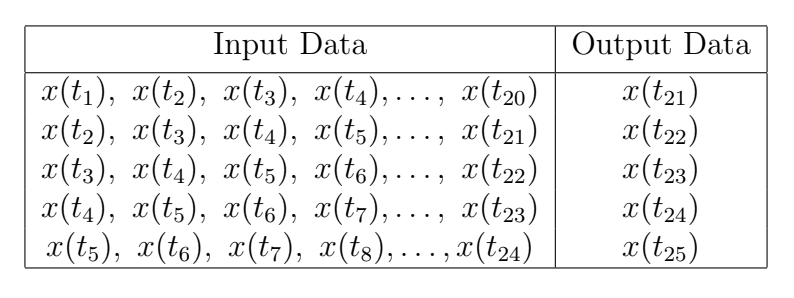

This form of the data is also known in machine learning as supervised learning, which mathematically is defined as the following:

*S ≡ (x1, y1),(x2, y2),(x3, y3), . . . ,(xN, yN)*, where

*N* - the number of data points (in this format)  
*xi* - the input dataset *X*  
*yi* - the output dataset *Y*  

Depending on *Y*’s continuity we can talk about a regression problem (when *Y* is continuous) or about a classification problem (when *Y* is discrete). Our problem clearly is a regression one and an example for *x* and *y* would be: *x1 ≡ {x(t1), x(t2), ..., x(t20)}* and *y1 ≡ x(t21)*. Even though there is a function *F : X → Y* which satisfies all the data points in *S* we will act as if we would not know the exact function and try to identify the mapping with the help of a machine learning algorithm.

### 2.1. Neural Network Architecture (Theory)

A visual representation of a neural network can be seen below:

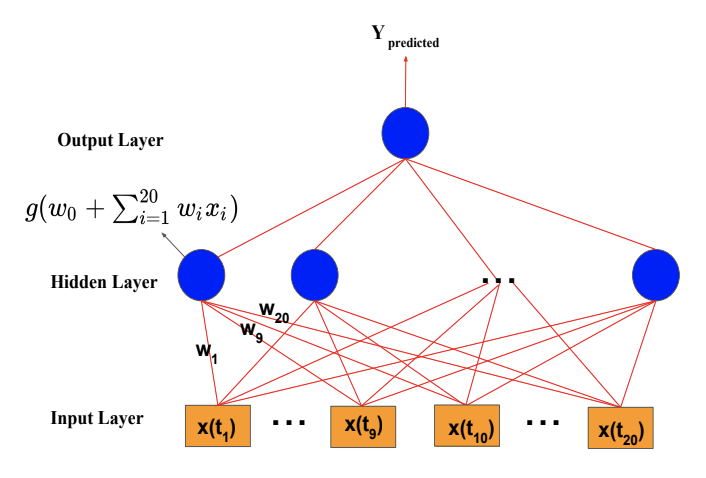

From the bottom up:

The first layer is always the so-called *input layer* (the orange boxes) and it has the job of bringing the initial data into the neural network.

All the intermediate layers are known as *hidden layers*. In the first hidden layer every node gets a set of inputs *{x(t1), x(t2), ..., x(td)}* (with *d* being the length of the sliding time window) from the previous layer. All of these are then multiplied with their corresponding weights *{w1,w2,...,wd}* and summed up. In the next step to adjust the output and add flexibility to the learning process a *w0*, called *bias term*, is added to the sum. In the end, all of this will have to pass through an activation function (introducing non-linearity into the model) to get the output *yˆ* of that node.

Mathematically in one formula, it can be described as

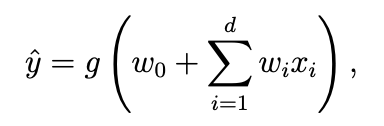
where

*g* - the activation function

The output from each node in the hidden layers is passed on as an input to the next layers in a forward direction until one reaches the last layer.


The last layer or the *output layer*. Here we get the predicted value or values (depending on the type of the problem: regression or classification).

A neural network model has parameters *(W)*, which are basically the weights and the biases for all the nodes, and hyperparameters, which can be for example the number of hidden layers, the number of neurons in a layer, the learning rate, etc.

In order to measure the prediction error of a machine learning algorithm we need to construct a so-called loss function *L(W)*. Mathematically it can be written as

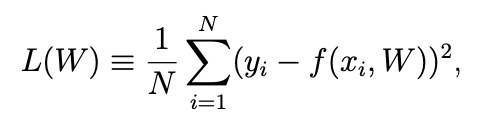 where

*yi* - the actual output data  
*f(xi, W)* - the predicted output with *xi* representing the input data  
*N* - the number of input data points  
*η* - the learning rate (responsible for the convergence of the algorithm)

Next, we learn the parameters *W** such that it satisfies

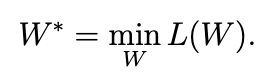

One way to do the optimization is through the gradient descent algorithm, which pseudo-code can be found below:

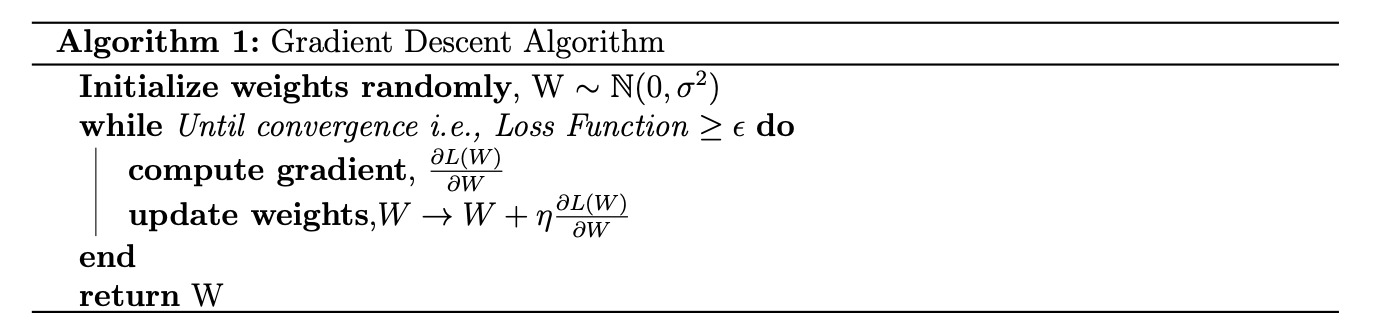 where

*η* - the learning rate (responsible for the convergence of the algorithm)

At each iteration, using a method called backpropagation, the loss function is computed with respect to all the parameters *∂L(W)/∂W*. Then the parameters are updated with their respective gradients. Once the model finished learning it should make predictions with high accuracy for the test dataset.

### 2.2. Creation of the Dataset (Dataset-I)

The dataset for this section corresponds to the Lorenz system, whose governing equations are

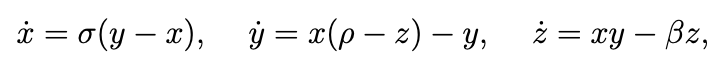 where

*ρ*, *σ* and *β* - the parameters of the system

To obtain the desired dataset we need to numerically integrate the Lorenz equations by the fourth-order Runge-Kutta method with the three-parameter values set to:

*σ* = 10  
*ρ* = 28  
*β* = 8/3

The system will exhibit chaotic behavior for these values.

The fourth-order Runge-Kutta method’s formulas are

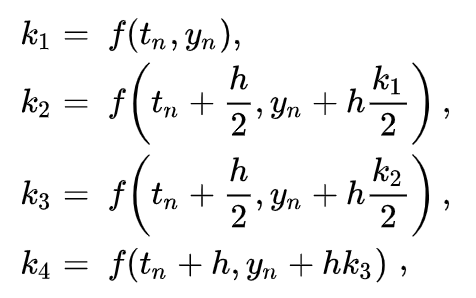 where

*tn* - the time  
*yn* - the unknown function of time *t*  
*h* - the step size  

After we created the dataset we will plot the evolution of the state *x* versus time.

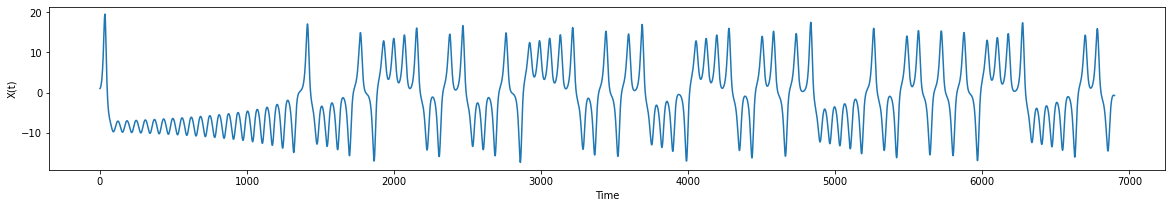

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz(t, x, y, z, sigma, rho, beta):
    """
    Function that describes the Lorenz equations.
    """
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z

    return dx, dy, dz

def runge_kutta_4(t, x, y, z, h, sigma, rho, beta):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Lorenz equations.
    """
    k1x, k1y, k1z = lorenz(t, x, y, z, sigma, rho, beta)
    k2x, k2y, k2z = lorenz(t + h/2, x + k1x*h/2, y + k1y*h/2, z + k1z*h/2, sigma, rho, beta)
    k3x, k3y, k3z = lorenz(t + h/2, x + k2x*h/2, y + k2y*h/2, z + k2z*h/2, sigma, rho, beta)
    k4x, k4y, k4z = lorenz(t + h, x + k3x*h, y + k3y*h, z + k3z*h, sigma, rho, beta)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6
    z += (k1z + 2*k2z + 2*k3z + k4z)*h/6

    return x, y, z

# Set the initial conditions
x0 = 1
y0 = 1
z0 = 1

# Set the time step and total time of integration
H = 0.01
T = 69

# Set the parameters
s = 10
r = 28
b = 8/3

# Initialize the arrays to store the results
# Original code had 't_values = np.arange(0, T+H, H)'
t_values = np.arange(0, T, H)
x_values = []
y_values = []
z_values = []

# Integrate the Lorenz equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0
current_z = z0

for t in t_values:
    current_x, current_y, current_z = runge_kutta_4(t, current_x, current_y, current_z, H, s, r, b)

    x_values.append(current_x)
    y_values.append(current_y)
    z_values.append(current_z)

plt.figure(figsize=(20, 3))
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.plot(x_values)

In the Lorenz equations, the variable *t* represents the time, and it appears on the right-hand side of the equations as a parameter. In this implementation, the variable *t* is not used in the definition of the function *lorenz()*, because it is not needed to compute the derivatives *dx*, *dy*, and *dz*. However, it is included as a parameter in the function definition for two reasons:
1. To make it clear that the Lorenz equations are a system of differential equations that describe the evolution of the state variables *x*, *y*, and *z* in time.
2. To make it possible to pass the value of *t* to the function *lorenz()* when it is called from the function *runge_kutta_4()*. This allows the integration method to track the time at which the state variables are being updated.
It is important to note that, in general, the time variable *t* does not have to be used in the function that describes the system of differential equations, as long as it is passed to the integration method.

The time-series data we have just created (more precisely only the state *x*) needs to be split into a training set (70% of the total data) and a test set (30% of the total data). Furthermore, the training set needs to be reconstructed in a *sliding time window* format (with *d* being the length of it, in our case 20).

In [ ]:
def transform_to_sliding_window(values, test_size_percentage=0.3, d=20):
  input_data_window_format = []
  output_data_window_format = []

  for i in range(len(values) - d):
    input_data = []

    for j in range(d):
      input_data.append(values[i + j])

    input_data_window_format.append(input_data)
    output_data_window_format.append(values[i + d])

  test_size = int(test_size_percentage * (len(values) - d))
  train_size = int((len(values) - d) - test_size)

  X_train = input_data_window_format[:train_size]
  X_test = input_data_window_format[-test_size:]

  y_train = output_data_window_format[:train_size]
  y_test = output_data_window_format[-test_size:]

  return X_train, y_train, X_test, y_test

### 2.3. Creation and the Training of the Model (Dataset-I)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the model
model = keras.Sequential([
    layers.Dense(100, input_dim=20, activation="tanh"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1),
])

def root_mean_squared_error(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean((y_true - y_pred)**2))

model.compile(
    loss=root_mean_squared_error,
    optimizer=keras.optimizers.experimental.SGD(
        learning_rate=10e-6,
        momentum=0.9,
    ),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

X_train, y_train, X_test, y_test = transform_to_sliding_window(x_values)

# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
151/151 [==============================] - 1s 2ms/step - loss: 7.4680 - root_mean_squared_error: 7.5050
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 6.7176 - root_mean_squared_error: 6.7601
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 5.9153 - root_mean_squared_error: 5.9510
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 5.2406 - root_mean_squared_error: 5.2870
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 4.5412 - root_mean_squared_error: 4.5831
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 3.9253 - root_mean_squared_error: 3.9637
Epoch 7/100
151/151 [==============================] - 0s 2ms/step - loss: 3.4858 - root_mean_squared_error: 3.5278
Epoch 8/100
151/151 [==============================] - 0s 2ms/step - loss: 3.1588 - root_mean_squared_error: 3.1931
Epoch 9/100
151/151 [==============================] - 0s 2ms/step - los

### 2.4. Predictions with the Model (Dataset-I)

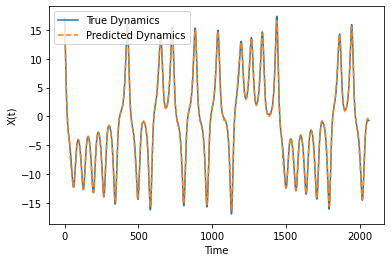

In [ ]:
y_pred = model.predict(X_test, verbose=0)

plt.plot(y_test)
plt.plot(y_pred, linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend({"True Dynamics", "Predicted Dynamics"})

### 2.5. Creation of the Dataset (Dataset-II)

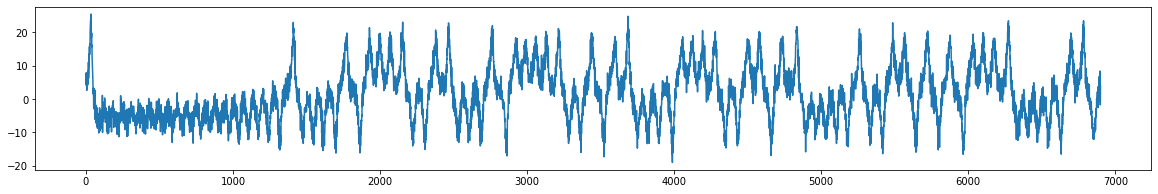

In [ ]:
noise = 2 * np.random.randn(len(x_values)) + 3

x_values += noise

plt.figure(figsize=(20, 3))
plt.plot(x_values)

### 2.6. Creation and the Training of the Model (Dataset-II)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the model
model = keras.Sequential([
    layers.Dense(128, input_dim=20, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1),
])

def root_mean_squared_error(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean((y_true - y_pred)**2))

model.compile(
    loss=root_mean_squared_error,
    optimizer=keras.optimizers.experimental.SGD(
        learning_rate=10e-6,
        momentum=0.9,
    ),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

X_train, y_train, X_test, y_test = transform_to_sliding_window(x_values)

# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
151/151 [==============================] - 1s 2ms/step - loss: 8.1265 - root_mean_squared_error: 8.1729
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 7.6694 - root_mean_squared_error: 7.7272
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 7.2821 - root_mean_squared_error: 7.3476
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 6.9752 - root_mean_squared_error: 7.0158
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 6.6519 - root_mean_squared_error: 6.7170
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 6.3821 - root_mean_squared_error: 6.4418
Epoch 7/100
151/151 [==============================] - 0s 2ms/step - loss: 6.1293 - root_mean_squared_error: 6.1817
Epoch 8/100
151/151 [==============================] - 0s 2ms/step - loss: 5.8632 - root_mean_squared_error: 5.9294
Epoch 9/100
151/151 [==============================] - 0s 2ms/step - los

### 2.7. Predictions with the Model (Dataset-II)

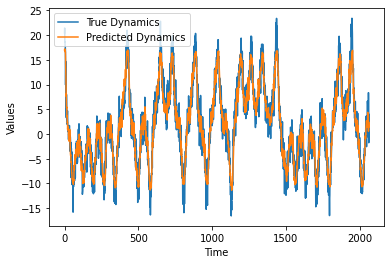

In [ ]:
y_pred = model.predict(X_test, verbose=0)

plt.plot(y_test)
plt.plot(y_pred, linestyle="solid")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend({"Predicted Dynamics", "True Dynamics"})

## 3. Sparse Identification of Nonlinear Dynamical Systems

### 3.1. Theory

Sparse Identification of Nonlinear Dynamical Systems. or SINDy for short, is a technique used to obtain the equations of a dynamical system in relation to the time-series data.

To better understand this concept, le's take the Duffing Oscillator as an example. The two equation that govern this nonlinear system are:

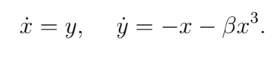

If we rewrite the above equation in terms of 2 matrix, it would result into the following model:

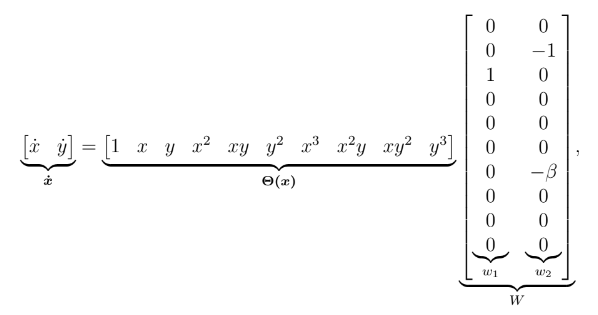

where Θ(x) represents the collection of polynomials, up to the third order.

Given the fact that the dynamic system of the Duffing Oscillator is quite simple, the weight matrix W, is very sparse. Each column of the W matrix represents the evolution of one single component. In this case, the two column correspond to x and y.

We will be able to construct the equation for each column (and therefore, component), by multiplying the numerical values of the weight vector to the polynomial library.

### 3.2. Creation of the Dataset (The Duffing-Van der Pol Oscillator)

It is worth mentioning that the Duffing-Van der Pol Oscillator has different goverinig equation, in comparison to the Duffing Oscillator that was used as an example in the previous section.

The dynamics of the Duffing-Van der Pol Oscillator are described using the following first-order equations:

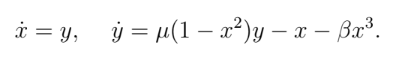

The fourth-order Runge-Kutta method is necessary in this section as well. The parameter values used in this analysis were:

μ = 10

β = 2


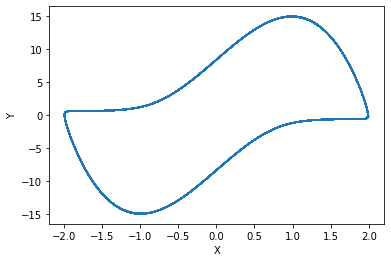

In [ ]:
def duffing_van(t, x, y, miu, beta):
    """
    Function that describes the Duffing-Van der Pol Oscillator equations.
    """
    dx = y
    dy = miu * (1 - x**2) * y - x - beta * x**3

    return dx, dy

def runge_kutta_4(t, x, y, h, miu, beta):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Duffing-Van der Pol Oscillator equations.
    """
    k1x, k1y = duffing_van(t, x, y, miu, beta)
    k2x, k2y = duffing_van(t + h/2, x + k1x*h/2, y + k1y*h/2, miu, beta)
    k3x, k3y = duffing_van(t + h/2, x + k2x*h/2, y + k2y*h/2, miu, beta)
    k4x, k4y = duffing_van(t + h, x + k3x*h, y + k3y*h, miu, beta)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6

    return x, y

# Set the initial conditions
x0 = 2
y0 = 0

# Set the time step and total time of integration
H = 0.01
T = 100

# Set the parameters
m = 10
b = 2

# Initialize the arrays to store the results
# Original code had 't_values = np.arange(0, T+H, H)'
t_values = np.arange(0, T, H)
x_values = []
y_values = []

# Integrate the Duffing-Van der Pol Oscillator equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0

for t in t_values:
    current_x, current_y = runge_kutta_4(t, current_x, current_y, H, m, b)

    x_values.append(current_x)
    y_values.append(current_y)

plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_values, y_values)

In [ ]:
%pip install pysindy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.1/113.1 KB 6.8 MB/s eta 0:00:00


### 3.3. Obtaining the Dynamics with SINDy (The Duffing-Van der Pol Oscillator)

In [ ]:
import pysindy as ps
from pysindy.feature_library.polynomial_library import PolynomialLibrary

poly_lib = PolynomialLibrary(degree=3)

model = ps.SINDy(feature_names=["x", "y"], feature_library=poly_lib)

X = np.stack((x_values, y_values), axis=-1)

model.fit(X, t=t_values)

model.print()

(x)' = 0.998 y
(y)' = -1.005 x + 9.914 y + -1.994 x^3 + -9.914 x^2 y


### 3.4. Comparing the Dynamics (The Duffing-Van der Pol Oscillator)

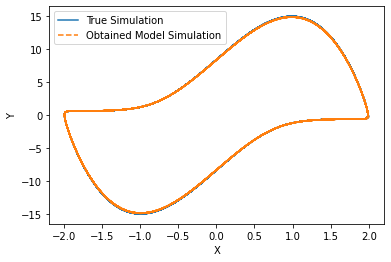

In [ ]:
def duffing_van(t, x, y):
    """
    Function that describes the Duffing-Van der Pol Oscillator equations.
    """
    dx = 0.998 * y
    dy = -1.005 * x + 9.914 * y + -1.994 * x**3 + -9.914 * x**2 * y

    return dx, dy

def runge_kutta_4(t, x, y, h):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Duffing-Van der Pol Oscillator equations.
    """
    k1x, k1y = duffing_van(t, x, y)
    k2x, k2y = duffing_van(t + h/2, x + k1x*h/2, y + k1y*h/2)
    k3x, k3y = duffing_van(t + h/2, x + k2x*h/2, y + k2y*h/2)
    k4x, k4y = duffing_van(t + h, x + k3x*h, y + k3y*h)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6

    return x, y

# Set the initial conditions
x0 = 2
y0 = 0

# Set the time step and total time of integration
H = 0.01
T = 100

# Set the parameters
m = 10
b = 2

# Initialize the arrays to store the results
x_values_sindy = []
y_values_sindy = []

# Integrate the Duffing-Van der Pol Oscillator equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0

for t in t_values:
    current_x, current_y = runge_kutta_4(t, current_x, current_y, H)

    x_values_sindy.append(current_x)
    y_values_sindy.append(current_y)

plt.plot(x_values, y_values)
plt.plot(x_values_sindy, y_values_sindy, linestyle="dashed")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend({"True Simulation", "Obtained Model Simulation"})

### 3.4. Noisy Duffing-Van der Pol Oscillator

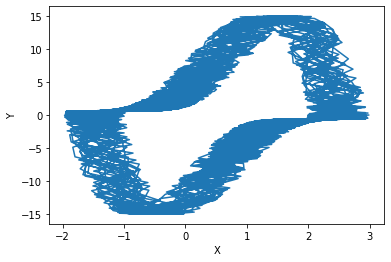

In [ ]:
noise = np.random.rand(len(x_values))

x_values += noise

plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_values, y_values)

In [ ]:
import pysindy as ps
from pysindy.feature_library.polynomial_library import PolynomialLibrary

poly_lib = PolynomialLibrary(degree=3)

model = ps.SINDy(feature_names=["x", "y"], feature_library=poly_lib)

X = np.stack((x_values, y_values), axis=-1)

model.fit(X, t=t_values)

model.print()

(x)' = 1.005 y
(y)' = 3.062 1 + -6.065 x + 6.246 y + 7.131 x y + -7.137 x^2 y


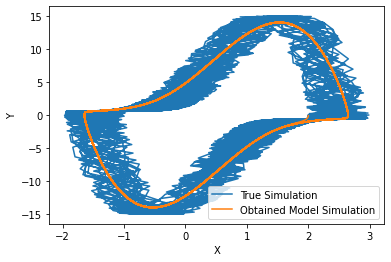

In [ ]:
def noisy_duffing_van(t, x, y):
    """
    Function that describes the Duffing-Van der Pol Oscillator equations.
    """
    dx = 1.005 * y
    dy = 3.062 * 1 + -6.065 * x + 6.246 * y + 7.131 * x * y + -7.137 * x**2 * y

    return dx, dy

def noisy_duffing_runge_kutta_4(t, x, y, h):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Duffing-Van der Pol Oscillator equations.
    """
    k1x, k1y = noisy_duffing_van(t, x, y)
    k2x, k2y = noisy_duffing_van(t + h/2, x + k1x*h/2, y + k1y*h/2)
    k3x, k3y = noisy_duffing_van(t + h/2, x + k2x*h/2, y + k2y*h/2)
    k4x, k4y = noisy_duffing_van(t + h, x + k3x*h, y + k3y*h)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6

    return x, y

# Set the initial conditions
x0 = 2
y0 = 0

# Set the time step and total time of integration
H = 0.01
T = 100

# Set the parameters
m = 10
b = 2

# Initialize the arrays to store the results
x_values_sindy = []
y_values_sindy = []

# Integrate the Duffing-Van der Pol Oscillator equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0

for t in t_values:
    current_x, current_y = noisy_duffing_runge_kutta_4(t, current_x, current_y, H)

    x_values_sindy.append(current_x)
    y_values_sindy.append(current_y)

plt.plot(x_values, y_values)
plt.plot(x_values_sindy, y_values_sindy)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend({"Obtained Model Simulation", "True Simulation"})

### 3.6. Creation of the Dataset (The Rossler attractor)

Next, the SINDy method was tested on a famous dynamical system that displays a chaotic attractor. In this case, the Rossler attractor was chosen.

The equations that capture the system dynamics are shown below:

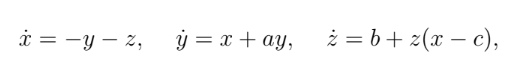

For the sake of the analysis, the following parameter values were used, which are known to result in chaotic behaviour:

a = 0.2

b = 0.2

c = 5.7

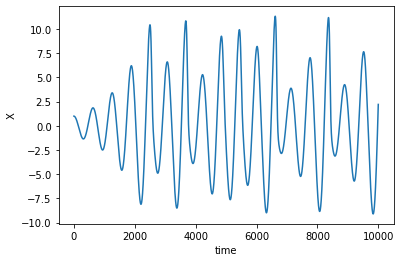

In [ ]:
def rossler(t, x, y, z, a, b, c):
    """
    Function that describes the Rossler attractor equations.
    """
    dx = - y - z
    dy = x + a * y
    dz = b + z * (x - c)

    return dx, dy, dz

def runge_kutta_4(t, x, y, z, h, a, b, c):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Rossler attractor equations.
    """
    k1x, k1y, k1z = rossler(t, x, y, z, a, b, c)
    k2x, k2y, k2z = rossler(t + h/2, x + k1x*h/2, y + k1y*h/2, z + k1z*h/2, a, b, c)
    k3x, k3y, k3z = rossler(t + h/2, x + k2x*h/2, y + k2y*h/2, z + k2z*h/2, a, b, c)
    k4x, k4y, k4z = rossler(t + h, x + k3x*h, y + k3y*h, z + k3z*h, a, b, c)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6
    z += (k1z + 2*k2z + 2*k3z + k4z)*h/6

    return x, y, z

# Set the initial conditions
x0 = 1
y0 = 0
z0 = 0

# Set the time step and total time of integration
H = 0.01
T = 100

# Set the parameters
A = 0.2
B = 0.2
C = 5.7

# Initialize the arrays to store the results
# Original code had 't_values = np.arange(0, T+H, H)'
t_values = np.arange(0, T, H)
x_values = []
y_values = []
z_values = []

# Integrate the Rossler attractor equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0
current_z = z0

for t in t_values:
    current_x, current_y, current_z = runge_kutta_4(t, current_x, current_y, current_z, H, A, B, C)

    x_values.append(current_x)
    y_values.append(current_y)
    z_values.append(current_z)

plt.xlabel("time")
plt.ylabel("X")
plt.plot(x_values)

### 3.7. Obtaining the Dynamics with SINDy (The Rossler attractor)

In [ ]:
import pysindy as ps
from pysindy.feature_library.polynomial_library import PolynomialLibrary

X = np.stack((x_values, y_values, z_values), axis=-1)

model = ps.SINDy(feature_names=["x", "y", "z"])
model.fit(X, t=t_values)

model.print()

(x)' = -1.000 y + -1.000 z
(y)' = 1.000 x + 0.200 y
(z)' = 0.200 1 + -5.697 z + 1.000 x z


### 3.8. Comparing the Dynamics (The Rossler attractor)

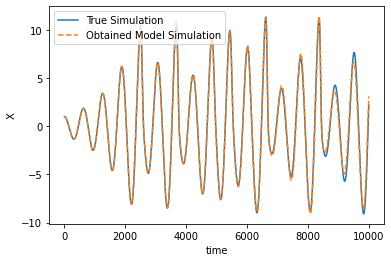

In [ ]:
def rossler(t, x, y, z):
    """
    Function that describes the Rossler attractor equations.
    """
    dx = - 1.000 * y - 1.000 * z
    dy = 1.000 * x + 0.200 * y
    dz = 0.200 * 1 + - 5.697 * z + 1.000 * x * z

    return dx, dy, dz

def runge_kutta_4(t, x, y, z, h):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Rossler attractor equations.
    """
    k1x, k1y, k1z = rossler(t, x, y, z)
    k2x, k2y, k2z = rossler(t + h/2, x + k1x*h/2, y + k1y*h/2, z + k1z*h/2)
    k3x, k3y, k3z = rossler(t + h/2, x + k2x*h/2, y + k2y*h/2, z + k2z*h/2)
    k4x, k4y, k4z = rossler(t + h, x + k3x*h, y + k3y*h, z + k3z*h)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6
    z += (k1z + 2*k2z + 2*k3z + k4z)*h/6

    return x, y, z

x_values_sindy = []
y_values_sindy = []
z_values_sindy = []

# Integrate the Rossler attractor equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0
current_z = z0

for t in t_values:
    current_x, current_y, current_z = runge_kutta_4(t, current_x, current_y, current_z, H)

    x_values_sindy.append(current_x)
    y_values_sindy.append(current_y)
    z_values_sindy.append(current_z)

plt.plot(x_values)
plt.plot(x_values_sindy, linestyle="dashed")
plt.xlabel("time")
plt.ylabel("X")
plt.legend({"True Simulation", "Obtained Model Simulation"})


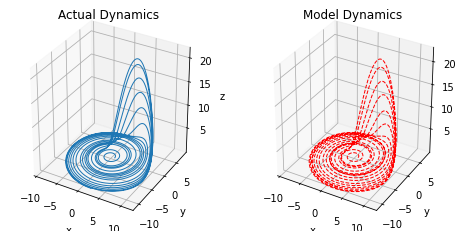

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot(x_values, y_values, z_values, lw=1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Actual Dynamics")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot(x_values_sindy, y_values_sindy, z_values_sindy, lw=1, linestyle="dashed", color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Model Dynamics")

plt.show()

### 3.9. Noisy Rossler Attractor

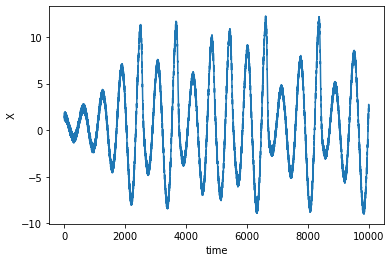

In [ ]:
noise = np.random.rand(len(x_values))

x_values += noise

plt.xlabel("time")
plt.ylabel("X")
plt.plot(x_values)

In [ ]:
X = np.stack((x_values, y_values, z_values), axis=-1)

model = ps.SINDy(feature_names=["x", "y", "z"])
model.fit(X, t=t_values)

model.print()

(x)' = -0.999 y + -0.993 z
(y)' = -0.496 1 + 0.996 x + 0.199 y
(z)' = 0.187 1 + -6.165 z + 0.999 x z


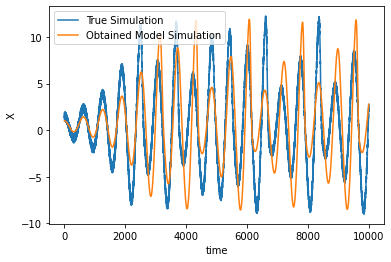

In [ ]:
def noisy_rossler(t, x, y, z):
    """
    Function that describes the Rossler attractor equations.
    """
    dx = -0.999 * y + -0.993 * z
    dy = -0.496 * 1 + 0.996 * x + 0.199 * y
    dz = 0.187 * 1 + -6.165 * z + 0.999 * x * z

    return dx, dy, dz

def noisy_rossler_runge_kutta_4(t, x, y, z, h):
    """
    Fourth-order Runge-Kutta method to numerically integrate the Rossler attractor equations.
    """
    k1x, k1y, k1z = noisy_rossler(t, x, y, z)
    k2x, k2y, k2z = noisy_rossler(t + h/2, x + k1x*h/2, y + k1y*h/2, z + k1z*h/2)
    k3x, k3y, k3z = noisy_rossler(t + h/2, x + k2x*h/2, y + k2y*h/2, z + k2z*h/2)
    k4x, k4y, k4z = noisy_rossler(t + h, x + k3x*h, y + k3y*h, z + k3z*h)

    x += (k1x + 2*k2x + 2*k3x + k4x)*h/6
    y += (k1y + 2*k2y + 2*k3y + k4y)*h/6
    z += (k1z + 2*k2z + 2*k3z + k4z)*h/6

    return x, y, z

x_values_sindy = []
y_values_sindy = []
z_values_sindy = []

# Integrate the Rossler attractor equations using the fourth-order Runge-Kutta method
current_x = x0
current_y = y0
current_z = z0

for t in t_values:
    current_x, current_y, current_z = noisy_rossler_runge_kutta_4(t, current_x, current_y, current_z, H)

    x_values_sindy.append(current_x)
    y_values_sindy.append(current_y)
    z_values_sindy.append(current_z)


plt.plot(x_values)
plt.plot(x_values_sindy, linestyle="solid")
plt.xlabel("time")
plt.ylabel("X")
plt.legend({"Obtained Model Simulation", "True Simulation"})

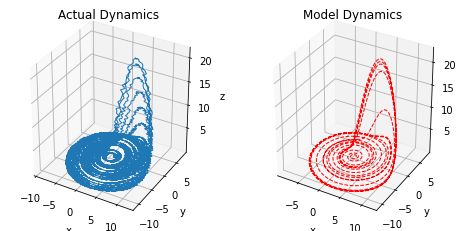

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot(x_values, y_values, z_values, lw=1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Actual Dynamics")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot(x_values_sindy, y_values_sindy, z_values_sindy, lw=1, linestyle="dashed", color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Model Dynamics")

plt.show()

## 4. Conclusions

The use of Neural Networks and SINDy for predicting and extracting the governing equations for dynamical systems has proven to be very promising.

The Neural network is able to predict the evolution of systems quite accurately, even in situation that resemble the real world, where noisy data is involved.

The SINDy method has high precision in determining the parameters and the nonlinearities in dynamics, but does not perform neatly when noisy data is involved.